In [2]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
#load the dataset
soap_df=pd.read_csv('BathSoapHousehold.csv')

In [4]:
#convert the data type for the member id to string
soap_df['Member id']=soap_df['Member id'].astype(str)

In [5]:
#check the data type for member id
soap_df['Member id'].dtype

dtype('O')

In [6]:
#set the member id as an index
soap_df.set_index('Member id', inplace=True)

In [7]:
#convert the data types to float
soap_df = soap_df.apply(lambda x: x.astype('float64'))
soap_df.head()

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564
1010020,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.347048,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000
1014020,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.121212,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247
1014030,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000
1014190,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.000000,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000


In [8]:
#shape of the dataframe
soap_df.shape

(600, 45)

In [9]:
#checking for null values
soap_df.isnull().sum()

SEC                      0
FEH                      0
MT                       0
SEX                      0
AGE                      0
EDU                      0
HS                       0
CHILD                    0
CS                       0
Affluence Index          0
No. of Brands            0
Brand Runs               0
Total Volume             0
No. of  Trans            0
Value                    0
Trans / Brand Runs       0
Vol/Tran                 0
Avg. Price               0
Pur Vol No Promo - %     0
Pur Vol Promo 6 %        0
Pur Vol Other Promo %    0
Br. Cd. 57, 144          0
Br. Cd. 55               0
Br. Cd. 272              0
Br. Cd. 286              0
Br. Cd. 24               0
Br. Cd. 481              0
Br. Cd. 352              0
Br. Cd. 5                0
Others 999               0
Pr Cat 1                 0
Pr Cat 2                 0
Pr Cat 3                 0
Pr Cat 4                 0
PropCat 5                0
PropCat 6                0
PropCat 7                0
P

In [10]:
#check the data types
soap_df.dtypes

SEC                      float64
FEH                      float64
MT                       float64
SEX                      float64
AGE                      float64
EDU                      float64
HS                       float64
CHILD                    float64
CS                       float64
Affluence Index          float64
No. of Brands            float64
Brand Runs               float64
Total Volume             float64
No. of  Trans            float64
Value                    float64
Trans / Brand Runs       float64
Vol/Tran                 float64
Avg. Price               float64
Pur Vol No Promo - %     float64
Pur Vol Promo 6 %        float64
Pur Vol Other Promo %    float64
Br. Cd. 57, 144          float64
Br. Cd. 55               float64
Br. Cd. 272              float64
Br. Cd. 286              float64
Br. Cd. 24               float64
Br. Cd. 481              float64
Br. Cd. 352              float64
Br. Cd. 5                float64
Others 999               float64
Pr Cat 1  

In [12]:
#display all the columns of the dataframe
pd.options.display.max_columns = None

#rename and replace the columns names
soap_df.rename(columns=lambda x: x.replace('Br. Cd. ', 'Brand_code_'), inplace=True) 
soap_df.rename(columns=lambda x: x.replace('Pr Cat ', 'Price_cat_'), inplace=True) 
soap_df.rename(columns=lambda x: x.replace('PropCat ', 'Prop_cat_'), inplace=True) 
soap_df.rename(columns={'Avg. Price ': 'Avg_price', 'Pur Vol No Promo - %': '%purch_no_promo', 
                       'Pur Vol Promo 6 %': '%purch_promo_6', 'Pur Vol Other Promo %':'%purch_other_promo',
                        'Trans / Brand Runs': 'Trans/BrandRuns', 'Others 999': 'Other_brands',
                        'SEC':'Socieconomic_class', 'FEH': 'Eating_Habits', 'MT': 'Native_language', 'SEX': 'Gender', 
                        'EDU': 'Education_level', 'AGE': 'Homemaker_age', 'HS': 'No._members_household', 'CHILD':'No._children', 
                        'CS': 'TV_availability', 'Brand_code_57,_144': 'Brand_codes_57_144'}, inplace=True) 
soap_df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True) 
soap_df.head()

,Socieconomic_class,Eating_Habits,Native_language,Gender,Homemaker_age,Education_level,No._members_household,No._children,TV_availability,Affluence_Index,No._of_Brands,Brand_Runs,Total_Volume,No._of__Trans,Value,Trans/BrandRuns,Vol/Tran,Avg_price,%purch_no_promo,%purch_promo_6,%purch_other_promo,Brand_codes_57_144,Brand_code_55,Brand_code_272,Brand_code_286,Brand_code_24,Brand_code_481,Brand_code_352,Brand_code_5,Other_brands,Price_cat_1,Price_cat_2,Price_cat_3,Price_cat_4,Prop_cat_5,Prop_cat_6,Prop_cat_7,Prop_cat_8,Prop_cat_9,Prop_cat_10,Prop_cat_11,Prop_cat_12,Prop_cat_13,Prop_cat_14,Prop_cat_15
Member id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1010010,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,3.0,17.0,8025.0,24.0,818.0,1.41,334.38,10.19,1.000000,0.000000,0.000000,0.376947,0.130841,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.492212,0.233645,0.560748,0.130841,0.074766,0.501558,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564
1010020,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,5.0,25.0,13975.0,40.0,1681.5,1.60,349.38,12.03,0.887299,0.096601,0.016100,0.021467,0.075134,0.0,0.000000,0.0,0.059034,0.0,0.144902,0.699463,0.293381,0.547406,0.094812,0.064401,0.456172,0.347048,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000
1014020,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,5.0,37.0,23100.0,63.0,1950.0,1.70,366.67,8.44,0.941558,0.019481,0.038961,0.025974,0.545455,0.0,0.030303,0.0,0.000000,0.0,0.019481,0.378788,0.120130,0.318182,0.561688,0.000000,0.244589,0.121212,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247
1014030,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,2.0,4.0,1500.0,4.0,114.0,1.00,375.00,7.60,1.000000,0.000000,0.000000,0.400000,0.600000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.400000,0.600000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000
1014190,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,3.0,6.0,8300.0,13.0,591.0,2.17,638.46,7.12,0.614458,0.144578,0.240964,0.048193,0.144578,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.807229,0.000000,0.048193,0.144578,0.807229,0.807229,0.000000,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000


In [14]:
#run descriptive statistics
soap_df.describe()

,Socieconomic_class,Eating_Habits,Native_language,Gender,Homemaker_age,Education_level,No._members_household,No._children,TV_availability,Affluence_Index,No._of_Brands,Brand_Runs,Total_Volume,No._of__Trans,Value,Trans/BrandRuns,Vol/Tran,Avg_price,%purch_no_promo,%purch_promo_6,%purch_other_promo,Brand_codes_57_144,Brand_code_55,Brand_code_272,Brand_code_286,Brand_code_24,Brand_code_481,Brand_code_352,Brand_code_5,Other_brands,Price_cat_1,Price_cat_2,Price_cat_3,Price_cat_4,Prop_cat_5,Prop_cat_6,Prop_cat_7,Prop_cat_8,Prop_cat_9,Prop_cat_10,Prop_cat_11,Prop_cat_12,Prop_cat_13,Prop_cat_14,Prop_cat_15
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,2.500000,2.048333,8.178333,1.738333,3.213333,4.043333,4.191667,3.233333,0.931667,17.02000,3.636667,15.751667,11914.770000,31.153333,1337.386433,2.617783,415.051217,11.834717,0.913008,0.053500,0.033492,0.183822,0.129347,0.033155,0.033948,0.019321,0.025923,0.034232,0.018186,0.521992,0.279037,0.493142,0.139204,0.088618,0.457164,0.092324,0.096909,0.080148,0.030806,0.020248,0.029367,0.006217,0.024938,0.136481,0.025398
std,1.118967,1.134964,4.294641,0.648510,0.865489,2.190004,2.300090,1.217110,0.507372,11.41008,1.579709,10.396481,7770.374508,17.427258,883.155463,2.604683,248.761232,3.742725,0.119490,0.092987,0.071985,0.236427,0.259727,0.090960,0.112892,0.079768,0.089362,0.121559,0.067905,0.297324,0.280887,0.311586,0.268034,0.191686,0.316348,0.166330,0.195760,0.152564,0.062816,0.076657,0.098467,0.026312,0.095448,0.266045,0.087592
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,150.000000,1.000000,20.000000,1.000000,94.430000,5.620000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,1.000000,4.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,10.00000,2.000000,8.000000,6825.000000,22.000000,789.562500,1.420000,250.515000,9.760000,0.878563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.278918,0.056671,0.208407,0.000000,0.000000,0.159766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000,3.000000,10.000000,2.000000,3.000000,4.500000,4.000000,4.000000,1.000000,15.00000,3.000000,15.000000,10360.000000,28.000000,1216.000000,1.845000,361.525000,11.250000,0.953468,0.000000,0.000000,0.080349,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.525096,0.180844,0.524981,0.000000,0.000000,0.444444,0.020155,0.012601,0.007750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.250000,3.000000,10.000000,2.000000,4.000000,5.000000,5.000000,4.000000,1.000000,24.00000,5.000000,21.000000,15343.750000,40.000000,1675.750000,2.690000,490.890000,13.417500,1.000000,0.068182,0.043783,0.282434,0.094904,0.019139,0.000000,0.000000,0.006101,0.000000,0.009526,0.778356,0.419852,0.747587,0.122525,0.070732,0.720000,0.103679,0.082935,0.086341,0.031645,0.000000,0.007739,0.000000,0.005522,0.118416,0.000000
max,4.000000,3.000000,19.000000,2.000000,4.000000,9.000000,15.000000,5.000000,2.000000,53.00000,9.000000,74.000000,50895.000000,138.000000,6371.850000,23.000000,2525.000000,33.330000,1.000000,0.666667,1.000000,1.000000,1.000000,0.963636,1.000000,1.000000,0.897507,0.993197,0.971098,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.971098,1.000000,0.963636,0.407643,1.000000,0

In [15]:
#get brandwise columns to create a new dataframe
cols=[]
for i in soap_df.columns:
    if i.startswith('Brand_code'):
        cols.append(i)
cols.append('Other_brands')       

In [16]:
cols

['Brand_codes_57_144',
 'Brand_code_55',
 'Brand_code_272',
 'Brand_code_286',
 'Brand_code_24',
 'Brand_code_481',
 'Brand_code_352',
 'Brand_code_5',
 'Other_brands']

In [19]:
#create a new dataframe for further use in histograms - using % of volume purchased of each brand (brand loyalty)
brand_loyalty_df=soap_df[cols]
brand_loyalty_df.head()

,Brand_codes_57_144,Brand_code_55,Brand_code_272,Brand_code_286,Brand_code_24,Brand_code_481,Brand_code_352,Brand_code_5,Other_brands
Member id,,,,,,,,,
1010010,0.376947,0.130841,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.492212
1010020,0.021467,0.075134,0.0,0.000000,0.0,0.059034,0.0,0.144902,0.699463
1014020,0.025974,0.545455,0.0,0.030303,0.0,0.000000,0.0,0.019481,0.378788
1014030,0.400000,0.600000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1014190,0.048193,0.144578,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.807229


In [20]:
#run a for loop to convert values of brand loyalty variables - when the volume is 0, change to NaN. 
for i in cols:
    soap_df.loc[soap_df[i]==0, i] = np.nan
soap_df.head()

,Socieconomic_class,Eating_Habits,Native_language,Gender,Homemaker_age,Education_level,No._members_household,No._children,TV_availability,Affluence_Index,No._of_Brands,Brand_Runs,Total_Volume,No._of__Trans,Value,Trans/BrandRuns,Vol/Tran,Avg_price,%purch_no_promo,%purch_promo_6,%purch_other_promo,Brand_codes_57_144,Brand_code_55,Brand_code_272,Brand_code_286,Brand_code_24,Brand_code_481,Brand_code_352,Brand_code_5,Other_brands,Price_cat_1,Price_cat_2,Price_cat_3,Price_cat_4,Prop_cat_5,Prop_cat_6,Prop_cat_7,Prop_cat_8,Prop_cat_9,Prop_cat_10,Prop_cat_11,Prop_cat_12,Prop_cat_13,Prop_cat_14,Prop_cat_15
Member id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1010010,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,3.0,17.0,8025.0,24.0,818.0,1.41,334.38,10.19,1.000000,0.000000,0.000000,0.376947,0.130841,NaN,NaN,NaN,NaN,NaN,NaN,0.492212,0.233645,0.560748,0.130841,0.074766,0.501558,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564
1010020,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,5.0,25.0,13975.0,40.0,1681.5,1.60,349.38,12.03,0.887299,0.096601,0.016100,0.021467,0.075134,NaN,NaN,NaN,0.059034,NaN,0.144902,0.699463,0.293381,0.547406,0.094812,0.064401,0.456172,0.347048,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000
1014020,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,5.0,37.0,23100.0,63.0,1950.0,1.70,366.67,8.44,0.941558,0.019481,0.038961,0.025974,0.545455,NaN,0.030303,NaN,NaN,NaN,0.019481,0.378788,0.120130,0.318182,0.561688,0.000000,0.244589,0.121212,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247
1014030,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,2.0,4.0,1500.0,4.0,114.0,1.00,375.00,7.60,1.000000,0.000000,0.000000,0.400000,0.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.400000,0.600000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000
1014190,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,3.0,6.0,8300.0,13.0,591.0,2.17,638.46,7.12,0.614458,0.144578,0.240964,0.048193,0.144578,NaN,NaN,NaN,NaN,NaN,NaN,0.807229,0.000000,0.048193,0.144578,0.807229,0.807229,0.000000,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000


In [21]:
#create a new dataframe with NaN for brand loyalty variables only
brand_loyalty2_df=soap_df[cols]
brand_loyalty2_df.head(5)

,Brand_codes_57_144,Brand_code_55,Brand_code_272,Brand_code_286,Brand_code_24,Brand_code_481,Brand_code_352,Brand_code_5,Other_brands
Member id,,,,,,,,,
1010010,0.376947,0.130841,NaN,NaN,NaN,NaN,NaN,NaN,0.492212
1010020,0.021467,0.075134,NaN,NaN,NaN,0.059034,NaN,0.144902,0.699463
1014020,0.025974,0.545455,NaN,0.030303,NaN,NaN,NaN,0.019481,0.378788
1014030,0.400000,0.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014190,0.048193,0.144578,NaN,NaN,NaN,NaN,NaN,NaN,0.807229


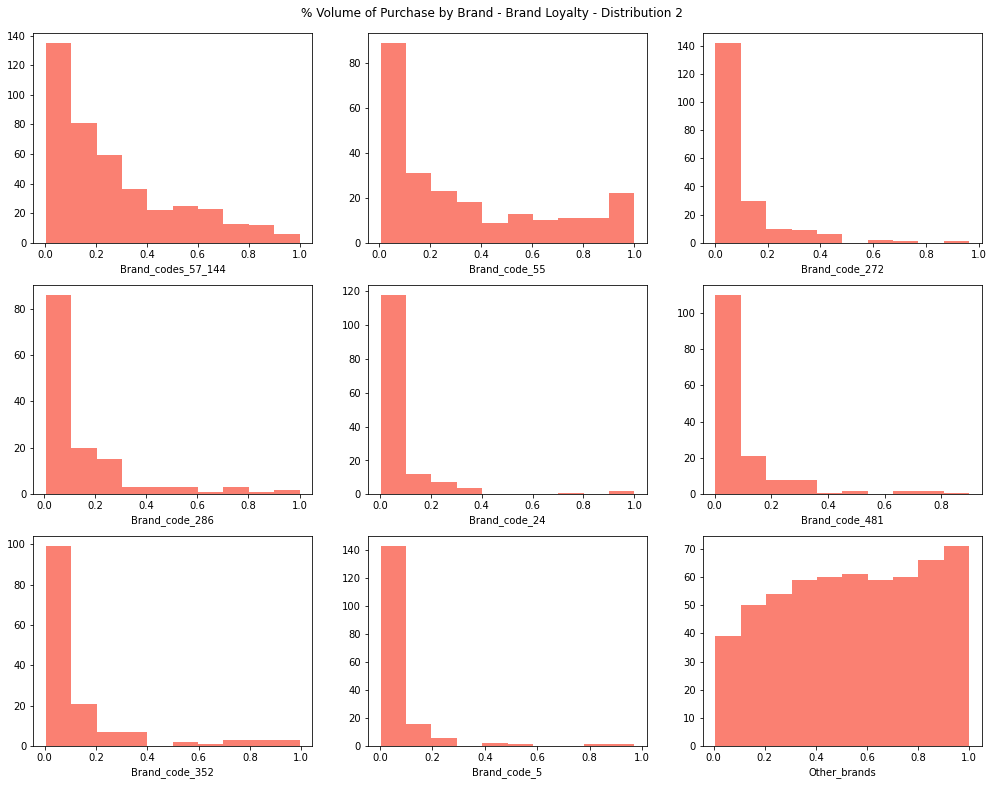

In [22]:
#frequency distribution of purchase volume by brand (brand loyalty - dataframe 2)
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(17,12))

#adjust the space between main title and subplots
fig.subplots_adjust(top=0.95)  
i=0

#create a subplot for each brand variable
for row in ax:
    for col in row:
        n=brand_loyalty2_df.columns[i]
        i=i+1
        plt.subplot(3,3,i, xlabel=n)
        plt.hist(brand_loyalty2_df[n], color='salmon')      
        
#set the title of the whole figure     
plt.suptitle("% Volume of Purchase by Brand - Brand Loyalty - Distribution 2")              

plt.show()

We see that brands 57/144 and 55 seem to have higher loyalty. Their customers buy at larger volumes when comparing to the other brands listed.  
Another observation is that many households buy brands not specified ("other brands") in various volumes. It may indicate that these customers are sensitive to price and inclined to promotion. 

In [23]:
#create a new dataframe for further use in histograms - using the demographics indicators
demographics_df=soap_df[['Socieconomic_class', 'Eating_Habits','Native_language', 'Gender','Homemaker_age', 'Education_level',
                         'No._members_household','No._children','TV_availability','Affluence_Index']]
demographics_df.head()

,Socieconomic_class,Eating_Habits,Native_language,Gender,Homemaker_age,Education_level,No._members_household,No._children,TV_availability,Affluence_Index
Member id,,,,,,,,,,
1010010,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0
1010020,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0
1014020,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0
1014030,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
1014190,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0


In [434]:
demographics_df1=demographics_df.drop(columns=['Native_language'])

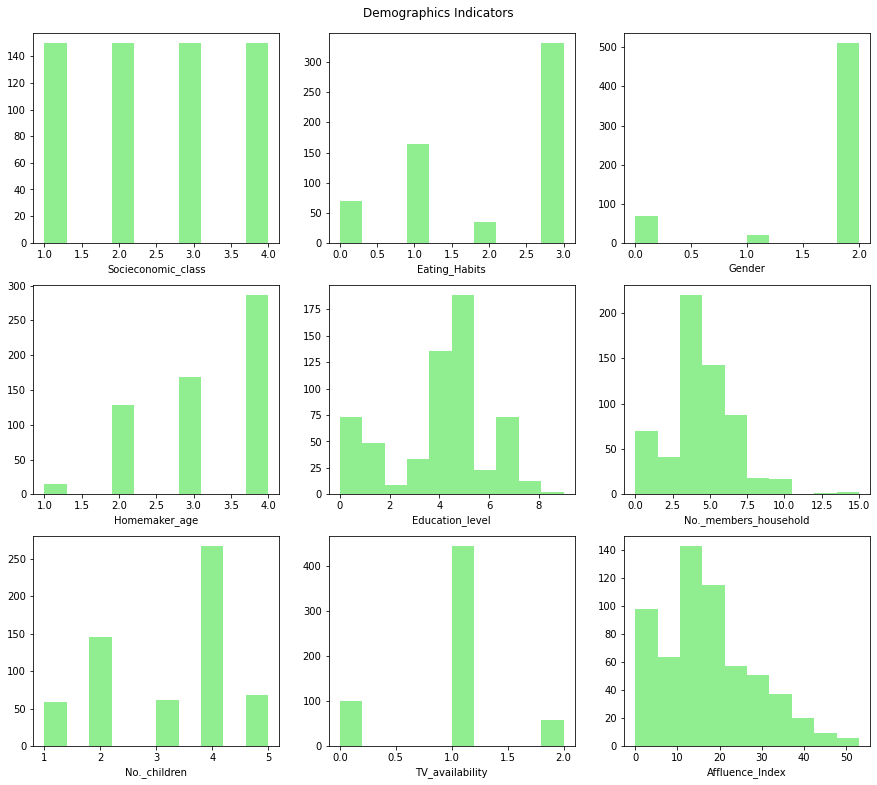

In [435]:
#demographic indicators frequency distribution
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
i=0
#adjust the space between main title and subplots
fig.subplots_adjust(top=0.95)  

for row in ax:
    for col in row:
        n=demographics_df1.columns[i]
        i=i+1
        plt.subplot(3,3,i, xlabel=n)
        plt.hist(demographics_df1[n], color='lightgreen')        
        
#set the title of the whole figure     
plt.suptitle("Demographics Indicators")   
plt.show()

**Data description of the demographics indicators:** 

*Socioeconomic class:* 1=high, 5=low 

*Eating habits:* 1 = vegetarian, 2 =vegetarian but eat eggs, 3 = nonvegetarian, 0 = not specified

*Gender of homemaker:* 1 = male, 2 = female 

*Age of homemaker:* 1 = Up to 24, 2 = 25-34, 3 = 35-44, 4= 45+

*Education of homemaker:*    
1 = Illiterate   
2 = Literate, but no formal schooling  
3 = Up to 4 years of school  
4 = 5-9 years of school  
5 = 10-12 years of school  
6 = Some college   
7 = College graduate  
8 = Some graduate school  
9 = Graduate or professional school degree  
0 = Not specified  

*Children:*   
1 = Children up to age 6 present (only)  
2 = Children 7-14 present (only)  
3 = Both  
4 = None   


**Description of the household sample:**
- Socioeconomic class is equally distributed among the sample;  
- Approximately 58% of the households are nonvegetarian and 26% are vegetarian;  
- The vast majority of the households consists of females;  
- Close to 74% of the homemakers are 35 years old and over;  
- Most of the households have a considered low level of education: 5 to 12 years of school. A very low sample has some graduate school;  
- In general, the sample represents a diverse number of people who live in the same house: most of the sample consists of 3 to 7 members;  
- Children indicator shows that there are many households without kids (45%). Families with 2 children account for 23%;  
- Over 70% of the households have access to cable or broadcast television;  
- People who are low-medium affluent account for the majority of the sample.   


In [24]:
#create a new dataframe for further use in histograms - purchase variables
purchase_df=soap_df[['No._of_Brands', 'Brand_Runs', 'Total_Volume','No._of__Trans', 'Value', 'Trans/BrandRuns', 
                            'Vol/Tran','Avg_price']]
purchase_df.head()

,No._of_Brands,Brand_Runs,Total_Volume,No._of__Trans,Value,Trans/BrandRuns,Vol/Tran,Avg_price
Member id,,,,,,,,
1010010,3.0,17.0,8025.0,24.0,818.0,1.41,334.38,10.19
1010020,5.0,25.0,13975.0,40.0,1681.5,1.60,349.38,12.03
1014020,5.0,37.0,23100.0,63.0,1950.0,1.70,366.67,8.44
1014030,2.0,4.0,1500.0,4.0,114.0,1.00,375.00,7.60
1014190,3.0,6.0,8300.0,13.0,591.0,2.17,638.46,7.12


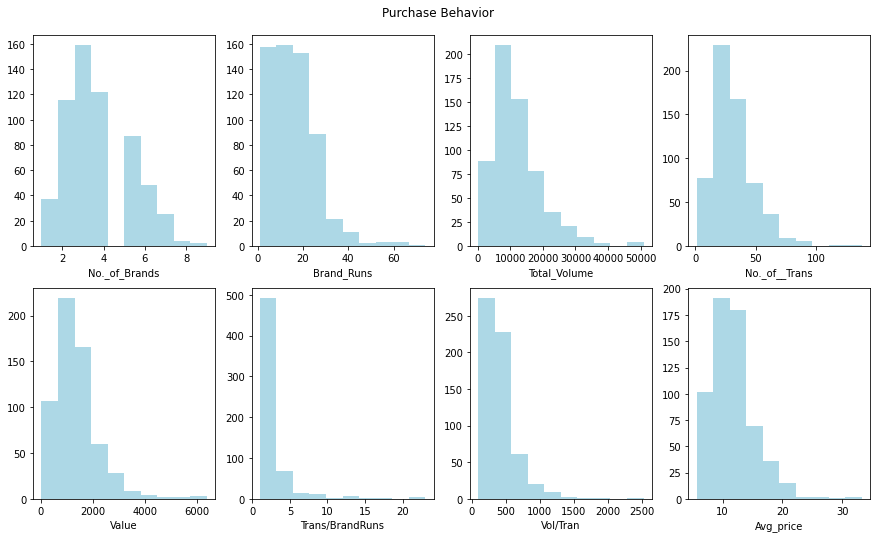

In [25]:
#purchase summary over the period - frequency distribution
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,8))
i=0

#adjust the space between main title and subplots
fig.subplots_adjust(top=0.93)  

for row in ax:
    for col in row:
        n=purchase_df.columns[i]
        i=i+1
        plt.subplot(2,4,i, xlabel=n)
        plt.hist(purchase_df[n], color='lightblue')        
        
plt.suptitle("Purchase Behavior")  
plt.show()

**Data description - basis of purchase**   
*No. of brands:* number of brands purchased   
*Brand runs:* number of runs of purchasing the same brand  
*Total volume:* Volume of product purchased (grams)   
*No. of trans:* Number of transactions  
*Value:* value in paise (monetary unit in India)   
*Trans/Brand Runs:* Avg transactions per brand run  
*Vol/trans:* Average volume per transaction  
*Avg price:* avg price in paise computed from total volume and value

**Key findings on the purchase behavior:**  
Most of the households buy up to 4 different brands;  
Over 90% of the households buy up to 30 times consecutively the same brand.   
The majority (68%) of the households spend between 1000-2000 paise.  
The most common average price is between 10-13 paise.   


In [26]:
#create a new dataframe for further use in histograms - purchase behavior with promotion 
purch_promo_df = pd.DataFrame(soap_df, columns=['%purch_no_promo', '%purch_promo_6', '%purch_other_promo'])
purch_promo_df.head()

,%purch_no_promo,%purch_promo_6,%purch_other_promo
Member id,,,
1010010,1.000000,0.000000,0.000000
1010020,0.887299,0.096601,0.016100
1014020,0.941558,0.019481,0.038961
1014030,1.000000,0.000000,0.000000
1014190,0.614458,0.144578,0.240964


In [27]:
#create a new columns from the sum of 2 columns
purch_promo_df['%purch_with_promo']=purch_promo_df['%purch_promo_6'] + purch_promo_df['%purch_other_promo']
purch_promo_df.head(3)

,%purch_no_promo,%purch_promo_6,%purch_other_promo,%purch_with_promo
Member id,,,,
1010010,1.000000,0.000000,0.000000,0.000000
1010020,0.887299,0.096601,0.016100,0.112701
1014020,0.941558,0.019481,0.038961,0.058442


In [440]:
#drop unecessary columns
purch_promo_df.drop(columns={'%purch_promo_6','%purch_other_promo'}, inplace=True)

In [28]:
purch_promo_df.head()

,%purch_no_promo,%purch_promo_6,%purch_other_promo,%purch_with_promo
Member id,,,,
1010010,1.000000,0.000000,0.000000,0.000000
1010020,0.887299,0.096601,0.016100,0.112701
1014020,0.941558,0.019481,0.038961,0.058442
1014030,1.000000,0.000000,0.000000,0.000000
1014190,0.614458,0.144578,0.240964,0.385542


In [33]:
purch_promo_df.loc[purch_promo_df['%purch_no_promo']==0, '%purch_no_promo'] = np.nan
purch_promo_df.loc[purch_promo_df['%purch_with_promo']==0, '%purch_with_promo'] = np.nan
purch_promo_df.head(10)

,%purch_no_promo,%purch_promo_6,%purch_other_promo,%purch_with_promo
Member id,,,,
1010010,1.000000,0.000000,0.000000,NaN
1010020,0.887299,0.096601,0.016100,0.112701
1014020,0.941558,0.019481,0.038961,0.058442
1014030,1.000000,0.000000,0.000000,NaN
1014190,0.614458,0.144578,0.240964,0.385542
1017020,1.000000,0.000000,0.000000,NaN
1017110,0.977387,0.022613,0.000000,0.022613
1017160,0.935484,0.000000,0.064516,0.064516
1017360,0.898075,0.101925,0.000000,0.101925


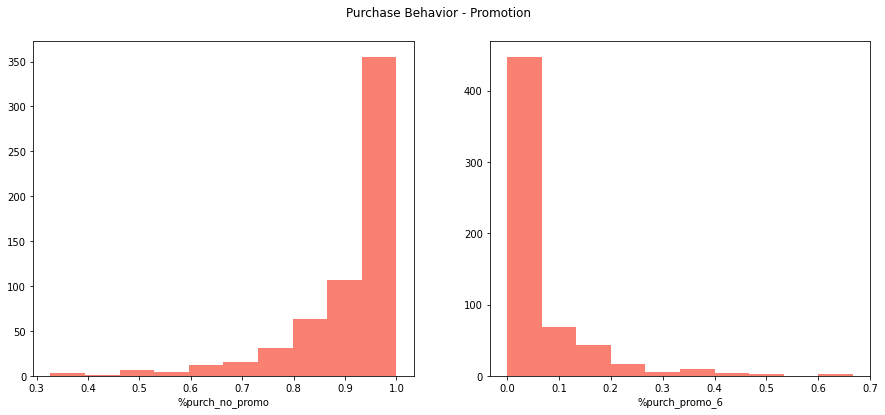

In [35]:
#purchase with promotion - frequency distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
i=0

#adjust the space between main title and subplots
fig.subplots_adjust(top=0.90)

for col in ax:
    #for row in col:
        n=purch_promo_df.columns[i]
        i=i+1
        plt.subplot(1,2,i, xlabel=n)
        plt.hist(purch_promo_df[n], color='salmon')          
    
plt.suptitle("Purchase Behavior - Promotion")   
plt.show()

Households volume of purchase with no promotion comprises the largest sample portion, which could mean those people are loyal to some brands.

In [36]:
#get price category columns to create a new dataframe - price category variables
price_cols=[]
for i in soap_df.columns:
    if i.startswith('Price'):
        price_cols.append(i)   

In [37]:
price_cols

['Price_cat_1', 'Price_cat_2', 'Price_cat_3', 'Price_cat_4']

In [38]:
#create a new dataframe for further use in histograms 
price_cat = pd.DataFrame(soap_df, columns=price_cols)

In [39]:
#check if the dataframe was created
price_cat.head()

,Price_cat_1,Price_cat_2,Price_cat_3,Price_cat_4
Member id,,,,
1010010,0.233645,0.560748,0.130841,0.074766
1010020,0.293381,0.547406,0.094812,0.064401
1014020,0.120130,0.318182,0.561688,0.000000
1014030,0.000000,0.400000,0.600000,0.000000
1014190,0.000000,0.048193,0.144578,0.807229


In [40]:
#iterate to set NaN values where values=0
for i in price_cols:
    price_cat.loc[price_cat[i]==0, i] = np.nan
price_cat.tail(10)

,Price_cat_1,Price_cat_2,Price_cat_3,Price_cat_4
Member id,,,,
1166470,0.389344,0.610656,NaN,NaN
1166740,0.566787,0.433213,NaN,NaN
1166870,0.009091,0.990909,NaN,NaN
1166960,NaN,0.785714,NaN,0.214286
1166980,0.259434,0.702830,NaN,0.037736
1167090,0.058172,0.941828,NaN,NaN
1167230,0.534653,0.366337,NaN,0.099010
1167340,0.170103,0.649485,0.180412,NaN
1167350,0.136364,0.509091,0.209091,0.145455


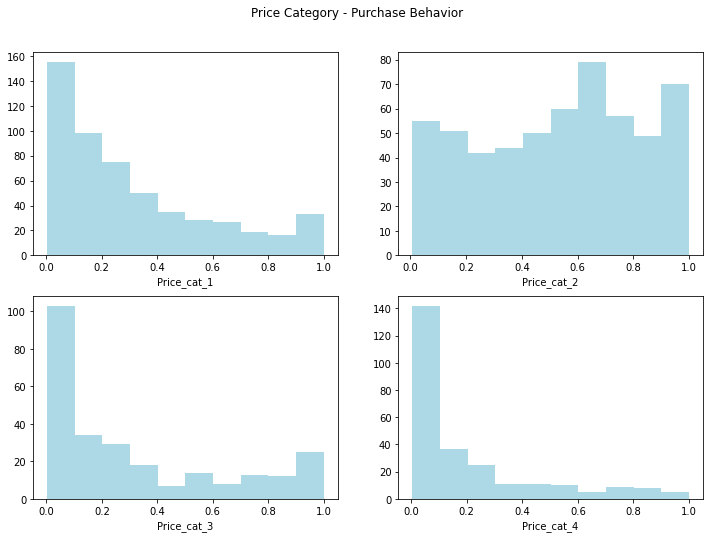

In [41]:
#price category purchase - frequency distribution
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
i=0

#adjust the space between main title and subplots
fig.subplots_adjust(top=0.90)

for row in ax:
    for col in row:
        n=price_cat.columns[i]
        i=i+1
        plt.subplot(2,2,i, xlabel=n)
        plt.hist(price_cat[n], color='lightblue')        
 
plt.suptitle("Price Category - Purchase Behavior")   

plt.show()

Over half of the households buy significant volumes in price category 2, and the price category 1 seems to have a moderate amount of purchase volume. 